In [0]:
#https://www.kaggle.com/c/twitter-sentiment-analysis2/

In [110]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [111]:
import os
os.listdir('/content/gdrive/My Drive/Colab Notebooks/Data_sets/twitter-sentiment-analysis2')

['test.csv', 'train.csv']

In [0]:
import pandas as pd
train=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data_sets/twitter-sentiment-analysis2/train.csv',encoding='latin-1')

In [113]:
train.head(4)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


In [0]:
train.drop('ItemID',inplace=True,axis=1)

In [0]:
test=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data_sets/twitter-sentiment-analysis2/test.csv',encoding='latin-1')

In [0]:
test.drop('ItemID',inplace=True,axis=1)

In [117]:
train.isnull().sum()

Sentiment        0
SentimentText    0
dtype: int64

In [118]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import re
def process(text):
  text=text.lower()
    
  review = re.sub(r'\W', ' ', text)
  review = review.lower()
  review = re.sub(r'^br$', ' ', review)
  review = re.sub(r'\s+br\s+',' ',review)
  review = re.sub(r'\s+[a-z]\s+', ' ',review)
  review = re.sub(r'^b\s+', '', review)
  review = re.sub(r'\s+', ' ', review)
  review = re.sub(r'[0-9]+', ' ', review)
  return review

In [0]:
train['SentimentText']=train['SentimentText'].apply(process)

In [0]:
test['SentimentText']=test['SentimentText'].apply(process)

In [96]:
test.head(3)

,SentimentText
0,is so sad for my apl friend
1,missed the new moon trailer
2,omg its already o


In [0]:
X1=train['SentimentText']

In [0]:
y=train['Sentiment']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size = 0.94, random_state = 0)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
tokenizer= Tokenizer(num_words=10000)

In [0]:
tokenizer.fit_on_texts(X_train)

In [127]:
X_train[:1]

41568     anastasiabucsis like it the storyline was fan...
Name: SentimentText, dtype: object

In [0]:
X_train = tokenizer.texts_to_sequences(X_train)

In [0]:
import pickle
pickle.dump(tokenizer, open("kaggle_tok_twitter_sen", 'wb'))

In [0]:
X_train[:1]

[[4220, 27, 4, 3, 4221, 21, 554, 16, 586, 4222]]

In [0]:
X_train = pad_sequences(X_train, maxlen=200)

In [105]:
X_train.shape

(5999, 200)

In [0]:
from keras.layers import Dense, Embedding,LSTM,Flatten
from keras.models import Sequential

In [0]:
model = Sequential()

model.add(Embedding(10000,200,mask_zero=True))
model.add(LSTM(1000,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
#model.add(LSTM(16,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 1000)        4804000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                132224    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 6,936,257
Trainable params: 6,936,257
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train, y_train,epochs=1, batch_size=2, verbose=1)

Epoch 1/1
5999/5999 [==============================] - 4517s 753ms/step - loss: 0.2469 - acc: 0.5588


In [0]:
model.save('Twitter_kaggle_keras.tw')

In [0]:
### using naive bayes

In [0]:
from keras.models import load_model
model = load_model('Twitter_kaggle_keras.tw')

In [0]:
tokenizer1 = pickle.load(open("kaggle_tok_twitter_sen", 'rb'))

In [0]:

mytest = tokenizer1.texts_to_sequences(["you are better"])

In [0]:
mytest = pad_sequences(mytest, maxlen=200)

In [134]:
model.predict(mytest)

array([[0.5028433]], dtype=float32)

In [0]:
consumer_key = '3Hl5Ilq4gEwW13kC5prMDI5ao'
consumer_secret = 'VS4Wc2REWuJIbnlcx3Cj90lKyMJGA9e8etBrrVsLjZdgVlK6Lb' 
access_token = '2183088190-3idIUXkbhDAxNCwXku06QKNMXiSq0DgMUY5mcTc'
access_secret ='SWyutClfD0bG6UvJwvNX6Zn0q2zO9yfS8GwHjRYbdbXzi'
import tweepy
from tweepy import OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['Pulwama'];
api = tweepy.API(auth,timeout=10)
list_tweets = []
query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent').items(100):
        list_tweets.append(status.text)

In [136]:
list_tweets[:4]

['Pulwama attack will keep inspiring us to uproot the base of terrorism : PM Modi\n\nRead @ANI story |… https://t.co/hqCSXvxf5D',
 '@republic Until Pulwama scandal by BJP is completely forgotten by our so called Secular public of India no awards… https://t.co/5wOGySYKvs',
 "@KhatijahFatima's account has been withheld in India in response to a legal demand. Learn more.",
 '@crpfindia Salute to you soldiers...pray to almighty..none of them fall pray of any conspiracy like Pulwama in futu… https://t.co/9QSBZ1Dmrz']

In [0]:
total_pos = 0
total_neg = 0
for tweet in list_tweets[:4]:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    tok = tokenizer1.texts_to_sequences(tweet)
    tok = pad_sequences(tok, maxlen=200)
    sent=model.predict(tok)
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

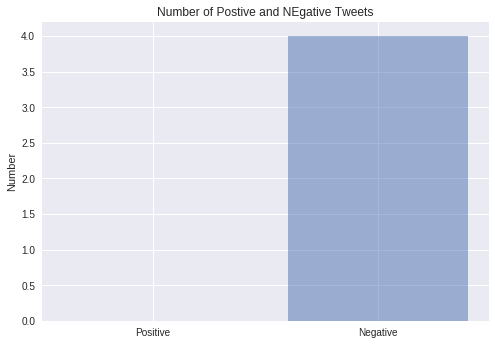

In [149]:
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer## dont need to pass BOW
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X1).toarray()

In [0]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [0]:
from sklearn.naive_bayes import BernoulliNB 

In [0]:
clf = BernoulliNB()
clf.fit(X_train1,y_train1)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:

pred = clf.predict(X_test1)


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, pred)


In [0]:
cm

array([[5768, 3014],
       [2275, 8941]])